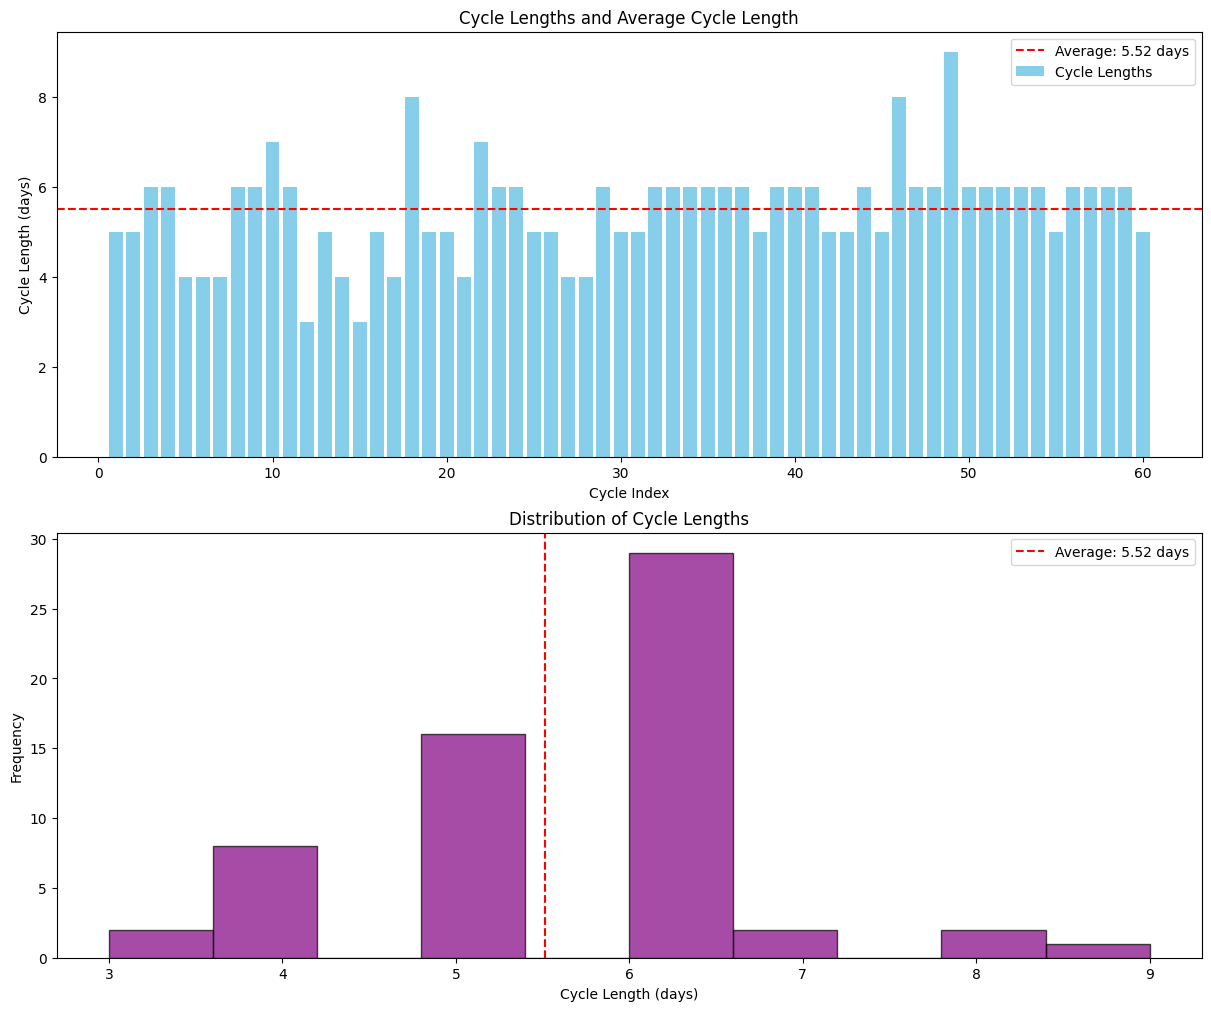

In [4]:
import json
from datetime import datetime
import matplotlib.pyplot as plt

# Load the JSON data
with open('cycle_data.json', 'r') as file:
    cycle_data = json.load(file)

# Calculate cycle lengths
cycle_lengths = []
for cycle in cycle_data:
    start_date = datetime.strptime(cycle["period_start_date"], "%Y-%m-%d %H:%M:%S.%f")
    end_date = datetime.strptime(cycle["period_end_date"], "%Y-%m-%d %H:%M:%S.%f")
    cycle_length = (end_date - start_date).days
    cycle_lengths.append(cycle_length)

# Calculate the average length
average_length = sum(cycle_lengths) / len(cycle_lengths)

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=True)

# Bar Chart (First Chart)
axs[0].bar(range(1, len(cycle_lengths) + 1), cycle_lengths, color='skyblue', label="Cycle Lengths")
axs[0].axhline(y=average_length, color='red', linestyle='--', label=f'Average: {average_length:.2f} days')
axs[0].set_xlabel("Cycle Index")
axs[0].set_ylabel("Cycle Length (days)")
axs[0].set_title("Cycle Lengths and Average Cycle Length")
axs[0].legend()

# Histogram (Second Chart)
axs[1].hist(cycle_lengths, bins=10, color='purple', alpha=0.7, edgecolor='black')
axs[1].axvline(x=average_length, color='red', linestyle='--', label=f'Average: {average_length:.2f} days')
axs[1].set_xlabel("Cycle Length (days)")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of Cycle Lengths")
axs[1].legend()

# Show the combined chart
plt.show()
